<a href="https://colab.research.google.com/github/prasanthi-k/covid-19/blob/master/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data=[120.12,133.3,100.11,98.8,99.12,78.55,63.98,63,54.55,50.03,45.33,43.0,34.4,20.44,10.5,3.0,5.0,6.0,5.02,10.33,12.34,24.22,33.11,53.23,37.23,45.22,53.56,68.34,73.77,84.13,97.34,103.45,113.54,145.34,170.34]

#Fitted curve for given Data

Plot containing 


* original data
*  fitted curve
*  residuals

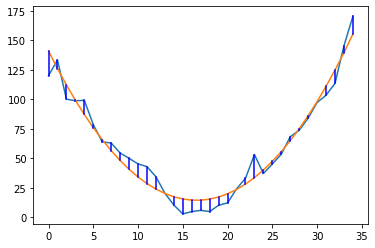

In [ ]:

from pylab import *
import numpy as np

x = np.arange(len(data))
p = polyfit(x, data, 2)
a, b, c = p
x0 = -0.5*b/a # x coordinate of vertex
xx = np.linspace(x.min(), x.max(), 35)
y=10*np.exp(xx)
# plot
fig, ax = plt.subplots()
plot(x, data)
plot(x, polyval(p, x))
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr
pline=polyval(p,x)
for i in range(len(x)):
  lineXdata = (i, i) # same X
  lineYdata = (data[i], pline[i]) # different Y
  plt.plot(lineXdata, lineYdata,'-b')
plt.show()

#Loading Covid Cases of each state

In [ ]:
import urllib.request
url="https://api.covid19india.org/states_daily.json"
data=urllib.request.urlopen(url).read().decode('utf-8').split("}")
#uploaded[file_name].decode("utf-8").split("}")
b=[]
for i in range(len(data)):
  b.append(data[i].split("\n\t\t\t"))
#data = uploaded[file_name].decode("utf-8").split("}")
#for i in range(258,260):
#  print(i,b[i])
print(b[-3][8],b[0][33],len(b))
d={}
for i in range(42):
  if i!=0 and i!=8 and i!=33:
    #print(b[0][i][1:3],'.',b[i][33][11:20])
    x=b[0][i][1:3]+'.'+'Confirmed'
    print(x,end=" ")
    k=[]
    for j in range(0,len(b)-2,3):
      y=[i for i in b[j][i].split("\"")]
      #print(y)
      k.append(int(y[3]))
    d[x]=k
    print(k)
for i in range(42):
  if i!=0 and i!=8 and i!=33:
    #print(b[0][i][1:3],'.',b[i][33][11:20])
    x=b[0][i][1:3]+'.'+'Recovered'
    print(x,end=" ")
    k=[]
    for j in range(1,len(b)-2 ,3):
      y=[i for i in b[j][i].split("\"")]
      #print(y)
      k.append(int(y[3]))
    d[x]=k
    print(k)
for i in range(42):
  if i!=0 and i!=8 and i!=33:
    #print(b[0][i][1:3],'.',b[i][33][11:20])
    x=b[0][i][1:3]+'.'+'Deceased'
    print(x,end=" ")
    k=[]
    for j in range(2,len(b)-2,3):
      y=[i for i in b[j][i].split("\"")]
      #print(y)
      k.append(int(y[3]))
    d[x]=k
    print(k)
print(d)
df_columns=d

In [ ]:
from datetime import datetime
dt=[]
for j in range(0,len(b) -2,3):
  y=[i for i in b[j][8].split("\"")]
  #print(y)
  date_object = datetime.strptime(y[3], '%d-%b-%y')
  print(date_object)
  dt.append(date_object)


In [ ]:
import pandas as pd 
df=pd.DataFrame(df_columns,index=dt)
print(df.shape)
df['mh.Confirmed']

(106, 117)


2020-03-14      14
2020-03-15      18
2020-03-16       6
2020-03-17       3
2020-03-18       3
              ... 
2020-06-23    3214
2020-06-24    3889
2020-06-25    4842
2020-06-26    5024
2020-06-27    6368
Name: mh.Confirmed, Length: 106, dtype: int64

#Fitted curve for covid cases in maharashtra

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


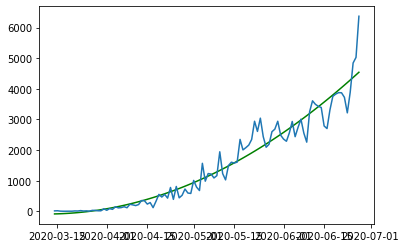

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as DT
import time
import statistics

dates = list(df.axes[0])
y = list(df['mh.Confirmed'])
x = mdates.date2num(dates)
z4 = np.polyfit(x, y, 3)
p4 = np.poly1d(z4)
fig, cx = plt.subplots()
xx = np.linspace(x.min(), x.max(), len(y))
dd = mdates.num2date(xx)
cx.plot(dd, p4(xx), '-g')
cx.plot(dates, y)

plt.show()


#using statistics methods to find the range

By using the average mean of distance from expected point to actual point we are finding the area

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/numpy/polynomial/polynomial.py:1336: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


105 105
+/- 107.0


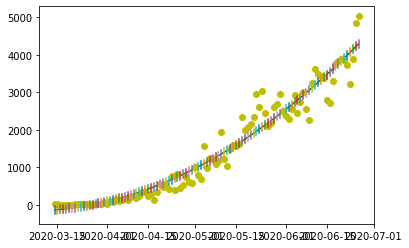

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as DT
import time
import statistics
dates = list(df.axes[0])
last_date=dates.pop(-1)
y = list(df['mh.Confirmed'])
last_val=y.pop(-1)
x = mdates.date2num(dates)
z4 = np.polyfit(x, y, 3)
p4 = np.poly1d(z4)
fig, cx = plt.subplots()
xx = np.linspace(x.min(), x.max(), len(y))
dd = mdates.num2date(xx)
cx.plot(dd, p4(xx), '-g')
cx.plot(dates, y, 'o', color='y', label='blub')
area_diff=[]
for i in range(len(dates)):
  area_diff.append(abs(y[i]-p4(xx)[i])//1)
mymean=(statistics.mean(area_diff))//2
for i in range(len(y)):
  lineXdata = (dd[i], dd[i]) # same X
  lineYdata = (p4(xx)[i]-mymean, p4(xx)[i]+mymean) # different Y
  plt.plot(lineXdata, lineYdata)

check=np.polynomial.polynomial.polyfit(x,y,3)
print(len(y),len(p4(xx)))
print('+/-',mymean)
plt.show()

 Using previous days information finding the range of next days data

In [ ]:
x_new=[last_date]
x_n=mdates.date2num(x_new)
ffit = np.polyval(check[::-1], x_n)
print('The range lies between ', ffit[0]-mymean,'and',ffit[0]+mymean)
print('print value predicted by me ',ffit[0]//1)
print('actual value',last_val)

The range lies between  4269.556396484375 and 4483.556396484375
print value predicted by me  4376.0
actual value 6368


#Finding new range by using confidence intervals

new range :
476.546791470716
547.8691982143425


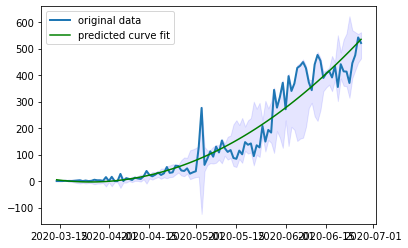

In [ ]:
time_series_array = np.sin(np.linspace(-np.pi, np.pi, 400)) + np.random.rand((400))
n_steps           = 5 #number of rolling steps for the mean/std.

#Compute curves of interest:
time_series_df = pd.DataFrame(p4(xx))
smooth_path    = time_series_df.rolling(n_steps).mean()
path_deviation = 2 * time_series_df.rolling(n_steps).std()

under_line     = (smooth_path-path_deviation)[0]-abs(p4(xx)-y)
over_line      = (smooth_path+path_deviation)[0]+abs(p4(xx)-y)
print("new range :")
print(smooth_path[0][len(smooth_path)-1]-path_deviation[0][len(smooth_path)-1])
print(smooth_path[0][len(smooth_path)-1]+path_deviation[0][len(smooth_path)-1])
plt.plot(dates,y, linewidth=2,label='original data') 
plt.plot(dd,p4(xx),'-g',label='predicted curve fit')
plt.legend(loc="upper left")
plt.fill_between(dates, under_line, over_line, color='b', alpha=.1)
plt.show()

#Dashboard showing the expected curve fit along with actual curve

,,
,,
,,
,,
,,
,,
,,
,,
,,
,,
,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

an.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


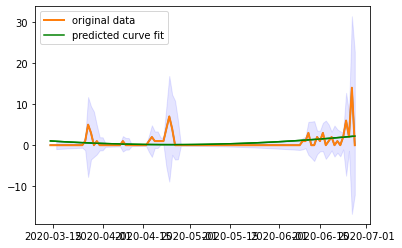

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ap.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


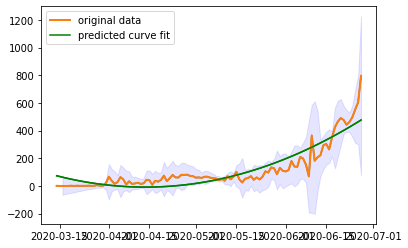

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


ar.Confirmed


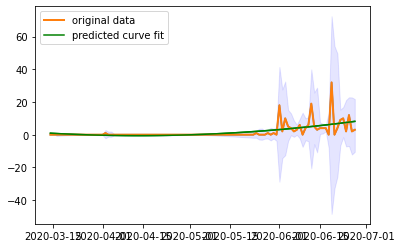

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


as.Confirmed


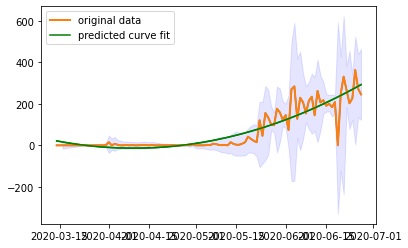

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

br.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


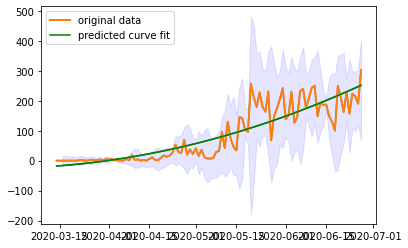

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ch.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


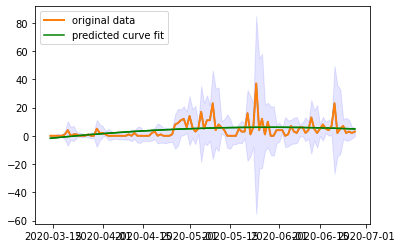

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ct.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


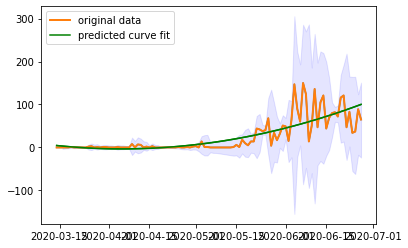

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

dd.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


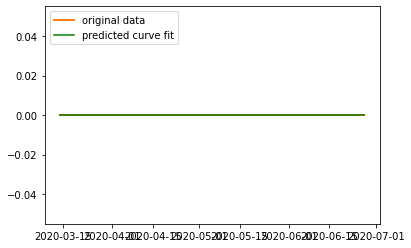

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

dl.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


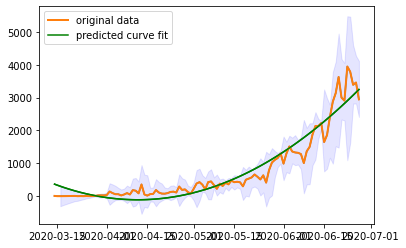

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

dn.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


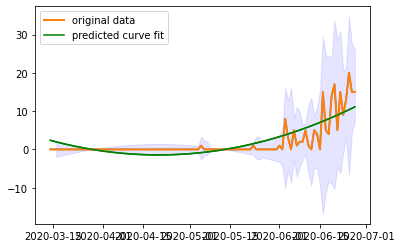

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ga.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


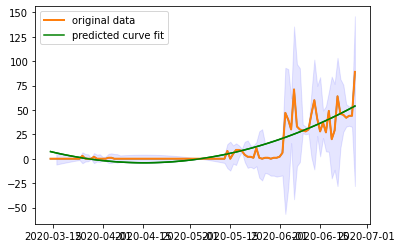

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

gj.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


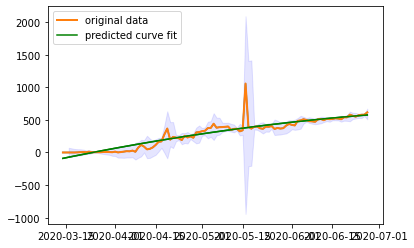

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hp.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


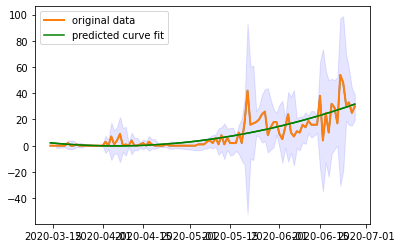

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hr.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


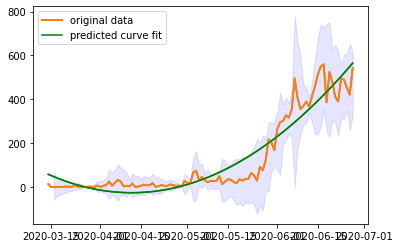

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

jh.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


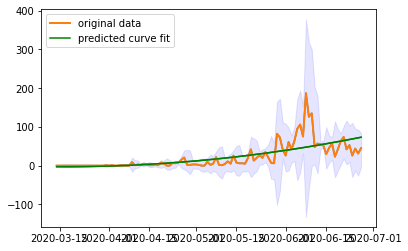

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

jk.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


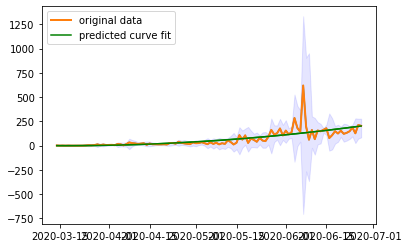

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ka.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


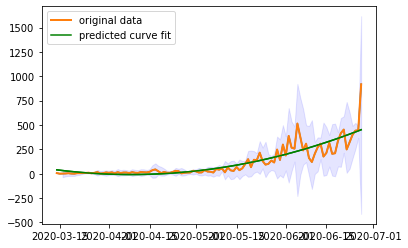

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

kl.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


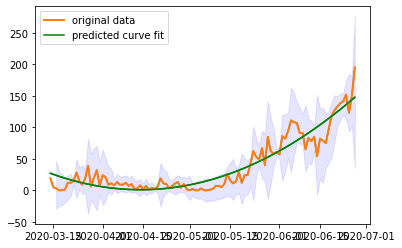

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

la.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


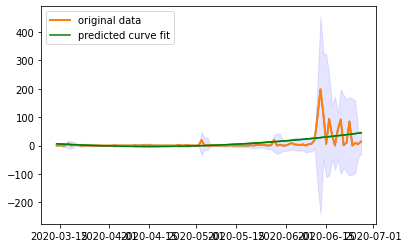

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ld.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


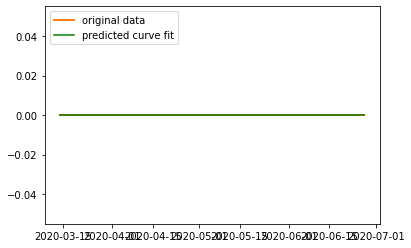

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

mh.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


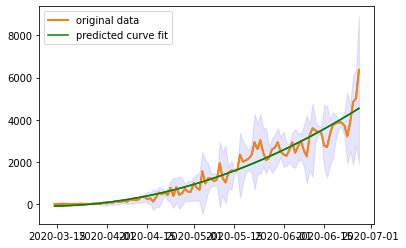

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ml.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


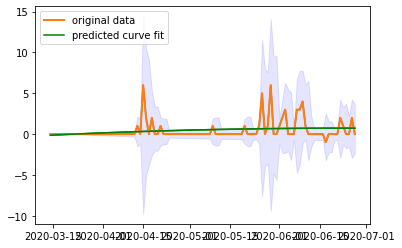

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

mn.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


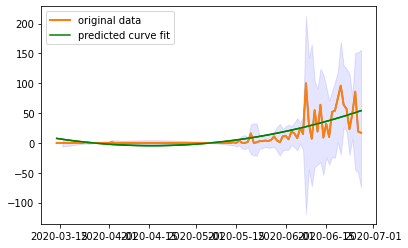

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

mp.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


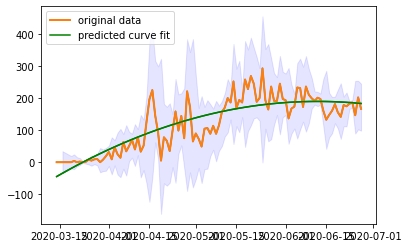

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

mz.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


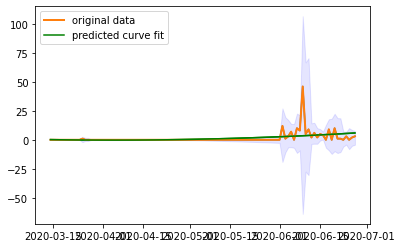

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


nl.Confirmed


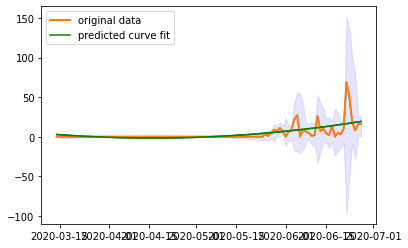

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

or.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


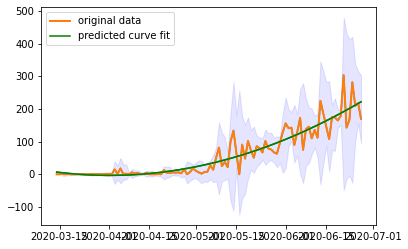

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

pb.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


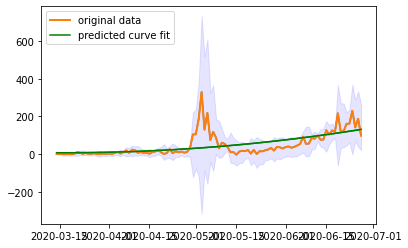

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

py.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


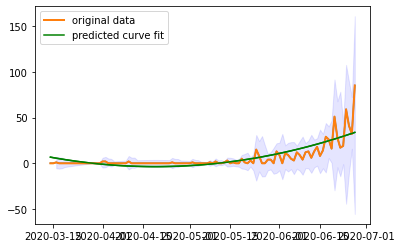

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

rj.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


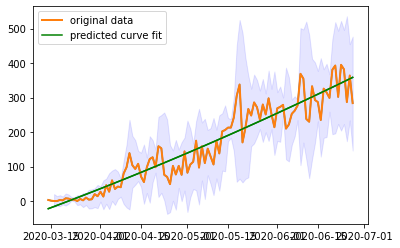

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

sk.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


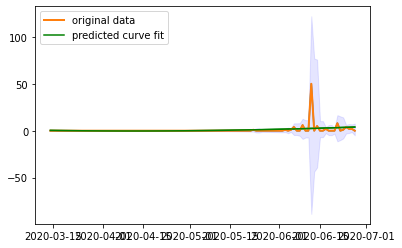

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

tg.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


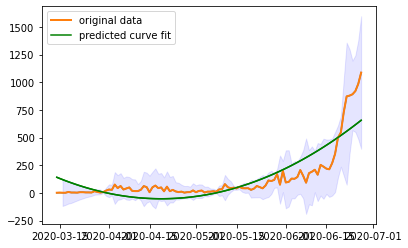

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

tn.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


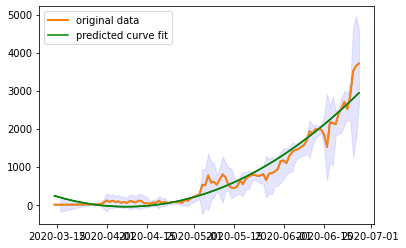

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


tr.Confirmed


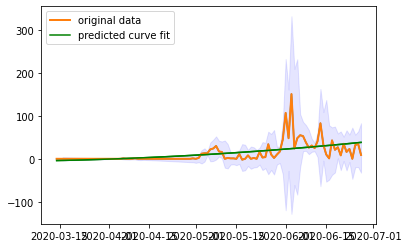

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

tt.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


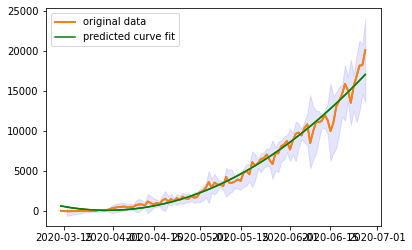

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


un.Confirmed


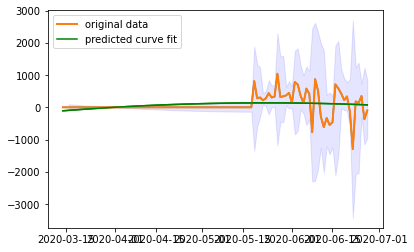

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

up.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


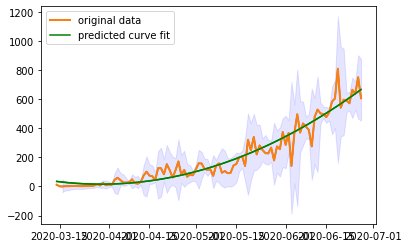

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ut.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


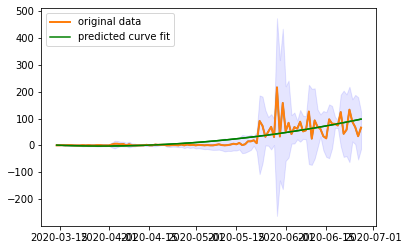

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

wb.Confirmed


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


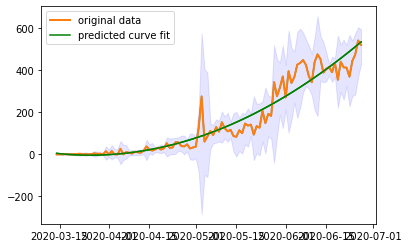

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import widgets
from matplotlib import pylab
grid = widgets.Grid(13, 3)
k=0
for i, (row, col) in enumerate(grid):
  print(list(df.axes[1])[k])
  dates = list(df.axes[0])
  y = list(df[list(df.axes[1])[k]])
  k+=1
  x = mdates.date2num(dates)
  z4 = np.polyfit(x, y, 4)
  p4 = np.poly1d(z4)
  fig, cx = plt.subplots()
  xx = np.linspace(x.min(), x.max(), len(y))
  dd = mdates.num2date(xx)
  cx.plot(dd, p4(xx), '-g')
  cx.plot(dates, y)
  time_series_array = np.sin(np.linspace(-np.pi, np.pi, 400)) + np.random.rand((400))
  n_steps           = 3 #number of rolling steps for the mean/std.

  #Compute curves of interest:
  time_series_df = pd.DataFrame(y)
  smooth_path    = time_series_df.rolling(n_steps).mean()
  path_deviation = 2 * time_series_df.rolling(n_steps).std()

  under_line     = (smooth_path-path_deviation)[0]-abs(p4(xx)-y)
  over_line      = (smooth_path+path_deviation)[0]+abs(p4(xx)-y)
  plt.plot(dates,y, linewidth=2,label='original data') #mean curve.
  plt.plot(dd,p4(xx),'-g',label='predicted curve fit')
  plt.legend(loc="upper left")
  plt.fill_between(dates, under_line, over_line, color='b', alpha=.1)
  plt.show()
